# EE 353

# Assignment 3: Classification and Feature Engineering

<p float="right">Pranav Prakash - 22B3945<p>

[Link to submission video](https://drive.google.com/drive/folders/16nMqVlgCYk7ZsQiOlTOD9qVxkSKNjVX1?usp=sharing)

Disclosure:  
Comments and docstrings added by _[0]_  

## **Objective 1**

We start off by importing all the libraries used going forward (these have been moved up into one place).

#### Libraries and Their Usage

- **`matplotlib.pyplot`**: Used for creating visualizations like plots and graphs.  
- **`numpy`**: Handles numerical operations and array manipulations.  
- **`pandas`**: Facilitates data manipulation and analysis.  
- **`seaborn`**: Enhances data visualization with advanced plots.  

##### Scikit-learn Submodules

- **`sklearn.base`**: Provides base classes for building custom models or estimators.  
- **`sklearn.ensemble`**: Contains ensemble methods like Random Forest, Gradient Boosting, etc., to improve predictive performance.  
- **`sklearn.feature_selection`**: Tools for selecting the most relevant features, like RFE and RFECV.  
- **`sklearn.inspection`**: Includes utilities for inspecting models, such as permutation importance.  
- **`sklearn.linear_model`**: Offers linear models like Logistic Regression and Linear Regression.  
- **`sklearn.metrics`**: Provides metrics to evaluate model performance, like accuracy, F1 score, and ROC-AUC.  
- **`sklearn.model_selection`**: Handles dataset splitting, hyperparameter tuning (e.g., GridSearchCV), and cross-validation.  
- **`sklearn.neural_network`**: Implements neural network models like MLPClassifier.  
- **`sklearn.preprocessing`**: Contains tools for preprocessing data, like scaling, normalization, and encoding.  
- **`sklearn.svm`**: Offers support vector machine algorithms for classification and regression tasks.  


*Generated via AI*

In [183]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Scikit-learn libraries
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC

In [144]:
df = pd.read_csv('bank.csv')

### **1) Exploratory Data Analysis (EDA)**

These datasets are not guaranteed to be perfect, issues like missing values and type mismatches need to be looked into before we start our analysis

In [145]:
display(df.head())
display(df.describe())
display(df.info()) # Includes info on the data types of each column
display(df.nunique()) # Number of unique values in each column
print(df.isnull().sum()[df.isnull().any()]) # Number of missing values in each column

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


None

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

Series([], dtype: int64)


All of the `object` type columns hae very few unique values, indicating they are some kind of categorizing labels.

In [146]:
# Filter out the object data columns names
object_cols = df.select_dtypes(include=['object']).columns

# Print the unique values in each of the object data columns
for col in object_cols:
    print(col, df[col].unique())

job ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital ['married' 'single' 'divorced']
education ['secondary' 'tertiary' 'primary' 'unknown']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome ['unknown' 'other' 'failure' 'success']
deposit ['yes' 'no']


Since we are going to be using the columns with models, rather than convert them to category types like before, we convert them to integer enumerations.

We employ thr `LabelEncoder` for this purpose.

In [147]:
# Generated by [1]
encoded_df = df.copy()
label_mappings = {}

le = LabelEncoder()
for col in object_cols:
    encoded_df[col] = le.fit_transform(df[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

for col in object_cols:
    print(col, label_mappings[col])


job {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
marital {'divorced': 0, 'married': 1, 'single': 2}
education {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}
default {'no': 0, 'yes': 1}
housing {'no': 0, 'yes': 1}
loan {'no': 0, 'yes': 1}
contact {'cellular': 0, 'telephone': 1, 'unknown': 2}
month {'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}
poutcome {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}
deposit {'no': 0, 'yes': 1}


In [148]:
display(encoded_df.head())
display(encoded_df.info())
display(encoded_df.describe())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int32
 2   marital    11162 non-null  int32
 3   education  11162 non-null  int32
 4   default    11162 non-null  int32
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int32
 7   loan       11162 non-null  int32
 8   contact    11162 non-null  int32
 9   day        11162 non-null  int64
 10  month      11162 non-null  int32
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int32
 16  deposit    11162 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 1.0 MB


None

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.015051,1528.538524,0.473123,0.130801,0.489697,15.658036,5.445709,371.993818,2.508421,51.330407,0.832557,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.818724,8.420740,3.191939,347.128386,2.722077,108.758282,2.292007,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,3.000000,138.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,63.000000,854.000000,58.000000,3.000000,1.000000


To determine which variables are useful (i.e. have a signifact/above-threshold correlation) with respect to our target variable `deposit`, we can plot the correlation matrix.

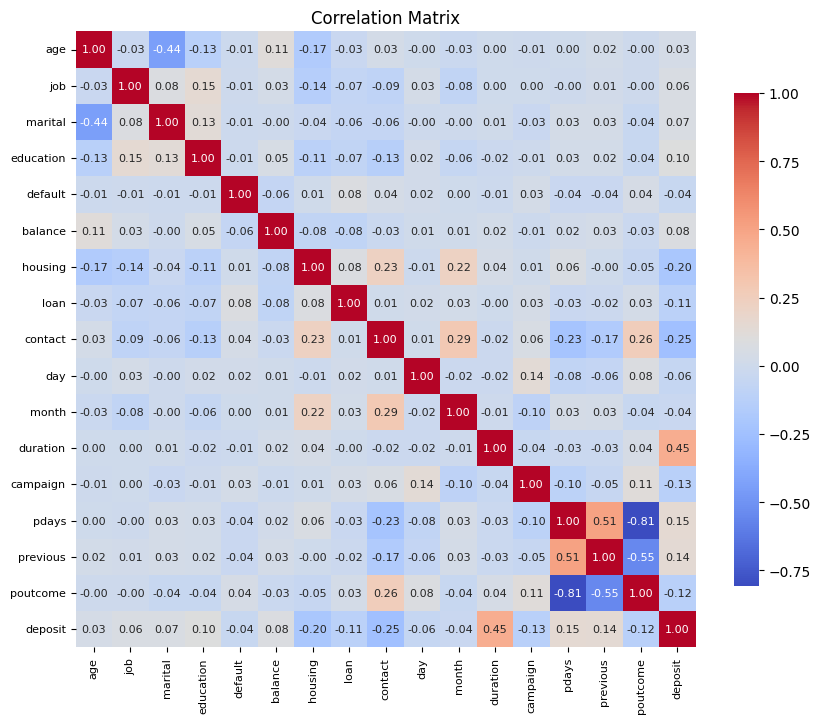

In [149]:
# Generated by [2]
# Correlation analysis for numeric data
corr_matrix = encoded_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8}, cbar_kws={"shrink": 0.8}, fmt=".2f")
plt.title("Correlation Matrix", fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [150]:
# Extract the target column from correlation matrix, and compare the absolute correlation values
corr_target = abs(corr_matrix['deposit'])
print(corr_target.sort_values(ascending=False))

deposit      1.000000
duration     0.451919
contact      0.249847
housing      0.203888
pdays        0.151593
previous     0.139867
campaign     0.128081
poutcome     0.122369
loan         0.110580
education    0.095948
balance      0.081129
marital      0.067610
job          0.063395
day          0.056326
default      0.040680
month        0.037121
age          0.034901
Name: deposit, dtype: float64


We can also look at the top 5 values in the correlation matrix not on the diagonal to see which other columns have significant correlation.

In [151]:
# Generated by [3]
sorted_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
sorted_corr = sorted_corr[sorted_corr < 1]
sorted_corr.head(5)

poutcome  pdays       0.806533
pdays     poutcome    0.806533
poutcome  previous    0.549333
previous  poutcome    0.549333
          pdays       0.507272
dtype: float64

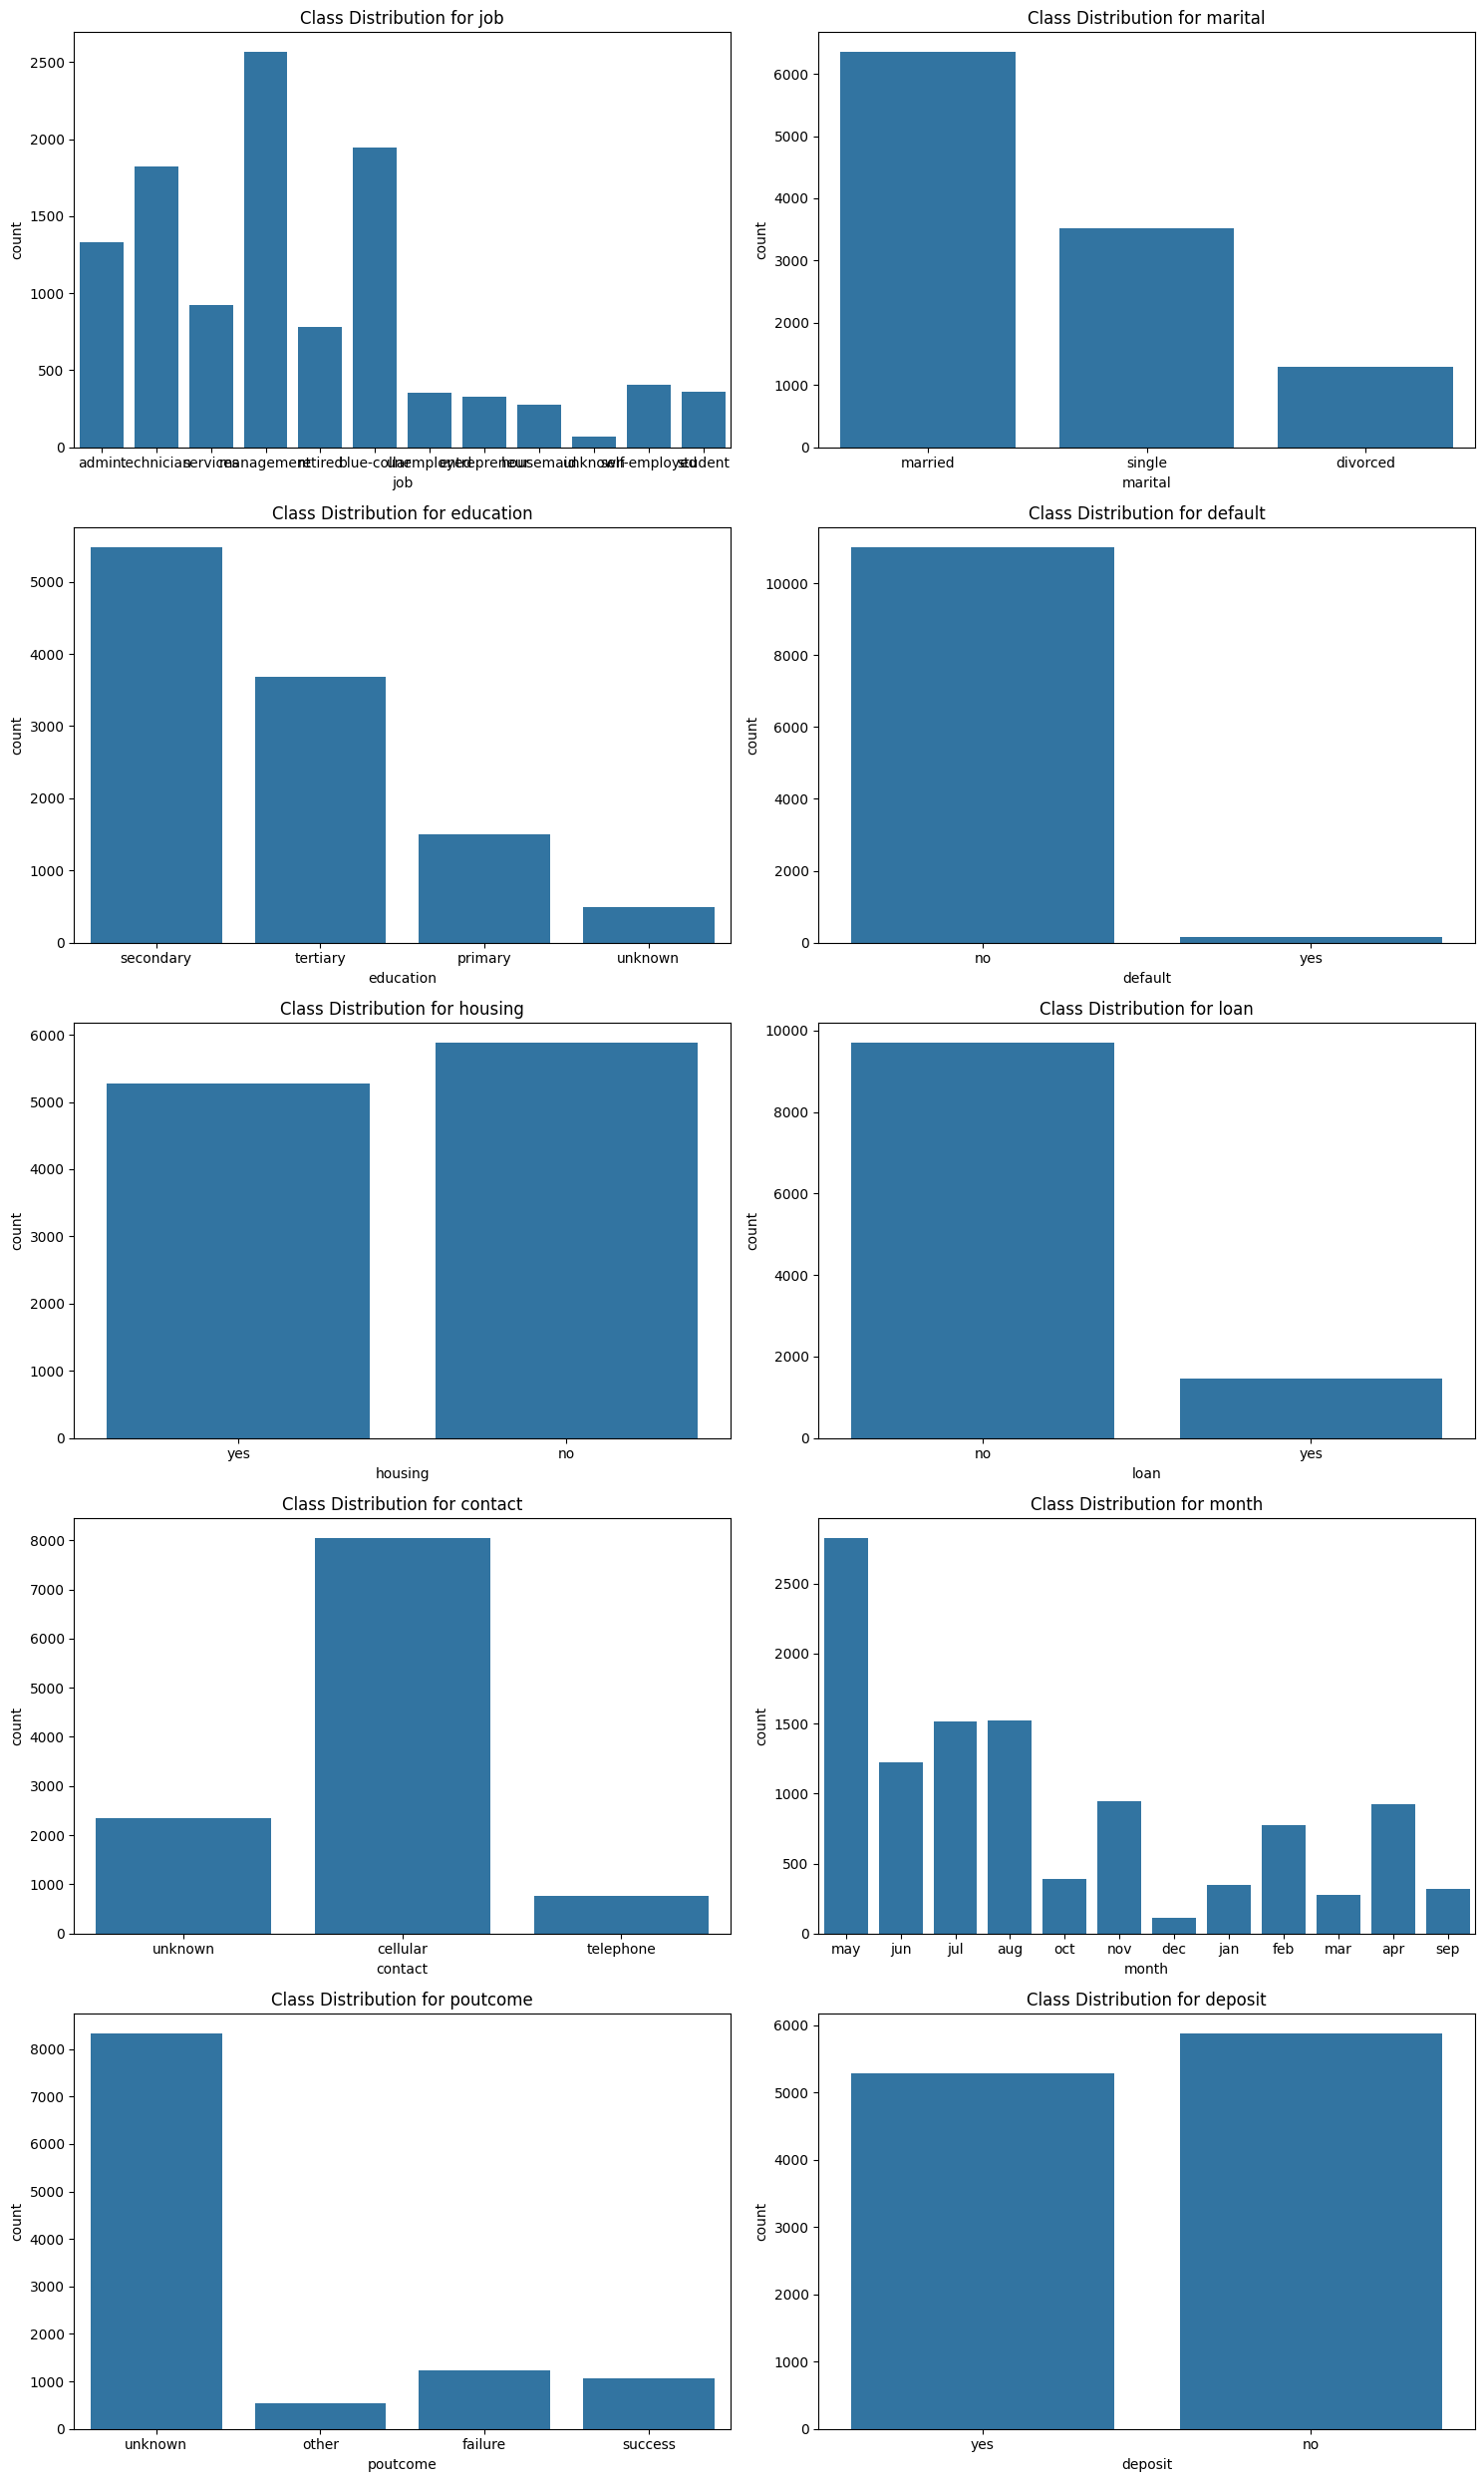

In [152]:
# Generated by [4]
# Check class balance and visualize for all object columns
fig, axes = plt.subplots(nrows=(len(object_cols) + 1) // 2, ncols=2, figsize=(15, 5 * ((len(object_cols) + 1) // 2)))

for i, col in enumerate(object_cols):
    row, col_idx = divmod(i, 2)
    class_balance = df[col].value_counts()
    sns.countplot(data=df, x=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Class Distribution for {col}")

# Remove any empty subplots
if len(object_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

Some classes are clearly unbalanced (_ex_ `poutcome`) whereas some are almost perfectly balanced (_ex_ `deposit`).

Before we move on, we go ahead and drop the 3 least useful columns according to correlation.

In [153]:
# Not useful columns because they have very little to no correlation with any variable (specifically the target variable)
df_updated = encoded_df.drop(['age', 'month', 'default'], axis=1) # drop columns

### **2) Metric Selection**

1. **Accuracy**: Measures the proportion of correct predictions to the total number of predictions. It provides an overall measure of the model's performance.

2. **F1 Score**: Balances **Precision** and **Recall**, making it particularly useful for evaluating models with **imbalanced classes** by considering both false positives and false negatives.

3. **AUC-ROC**: Represents the model's ability to **distinguish between classes**, with the **Area Under the Curve (AUC)** of the **Receiver Operating Characteristic (ROC)** curve reflecting performance at various thresholds.

_Suggested by [5]_

### **3) Variable Filtering and Coding**

We should normalize the variables since methods involving gradient descent are sensitive to scale. It ensures that each feature contributes equally to the model's performance and helps in faster convergence during training.

In [154]:
# Normalizing continuous variables
scaler = StandardScaler()
df_updated[['balance', 'duration', 'campaign', 'pdays', 'previous']] = scaler.fit_transform(df_updated[['balance', 'duration', 'campaign', 'pdays', 'previous']])
df_updated.describe()

,job,marital,education,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,1.116200e+04,11162.000000,11162.000000,11162.000000,11162.000000,1.116200e+04,1.116200e+04,1.116200e+04,1.116200e+04,11162.000000,11162.000000
mean,4.487905,1.199337,1.285164,1.018517e-17,0.473123,0.130801,0.489697,15.658036,8.148134e-17,3.055550e-17,5.092584e-18,-2.037033e-17,2.477782,0.473840
std,3.225132,0.625552,0.749478,1.000045e+00,0.499299,0.337198,0.818724,8.420740,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.002952,0.499338
min,0.000000,0.000000,0.000000,-2.596850e+00,0.000000,0.000000,0.000000,1.000000,-1.065918e+00,-5.541683e-01,-4.811841e-01,-3.632598e-01,0.000000,0.000000
25%,1.000000,1.000000,1.000000,-4.360996e-01,0.000000,0.000000,0.000000,8.000000,-6.741146e-01,-5.541683e-01,-4.811841e-01,-3.632598e-01,2.000000,0.000000
50%,4.000000,1.000000,1.000000,-3.033975e-01,0.000000,0.000000,0.000000,15.000000,-3.370484e-01,-1.867854e-01,-4.811841e-01,-3.632598e-01,3.000000,0.000000
75%,7.000000,2.000000,2.000000,5.564233e-02,1.000000,0.000000,1.000000,22.000000,3.572503e-01,1.805976e-01,-2.811903e-01,7.305850e-02,3.000000,1.000000
max,11.000000,2.000000,3.000000,2.470351e+01,1.000000,1.000000,2.000000,31.000000,1.010912e+01,2.222358e+01,7.380638e+00,2.494320e+01,3.000000,1.000000


Discrete variable values could be grouped into larger groups, thereby possibly reducing complexity and increasing balance. In our case though we can go ahead with the values as-is.


**Key Observations on Variable Relevance** _[6]_

1. **`balance`**:  
   - Large range (-2.60 to 24.70) with a mean near zero suggests potential **outliers** or **noise**.

2. **`duration`**:  
   - Large range (-1.07 to 10.11) and high variance may indicate **data inconsistencies** or **true variability**.  
   - Likely relevant due to its link to **engagement** but may require **scaling or transformation**.

3. **`campaign`**:  
   - Maximum value (22.22) indicates possible **outliers** from excessive contact attempts, likely skewing the results.

### **4) Creating Test Data**

Balancing the test data could be thought of as both making the test data balanced or maintaining the same balance as the total data. The latter is simple to implement. The former can also be done by making samples of minority classes more likely to end up in the test data.

In [155]:
X = df_updated.drop('deposit', axis=1)
y = df_updated['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

### **5) Hyperparameter Tuning**

All code generated via variations of _[7]_

#### **RBF Kernel SVM**

In [156]:
C_range = np.logspace(-1, 1, 3)

param_grid_svm = {'C': C_range, 'gamma': ['scale', 'auto']}
grid_svm = GridSearchCV(SVC(kernel='rbf'), param_grid_svm, refit=True, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("Optimal hyperparameters for SVM:", grid_svm.best_params_)

Optimal hyperparameters for SVM: {'C': 10.0, 'gamma': 'scale'}


#### **Neural Network**

In [157]:
hidden_layer_sizes_range = [(size,) for size in np.linspace(10, 100, num=10, dtype=int)]
alpha_range = np.logspace(-4, -2, num=3)

param_grid_nn = {'hidden_layer_sizes': hidden_layer_sizes_range, 'alpha': alpha_range}
grid_nn = GridSearchCV(MLPClassifier(activation='relu', max_iter=500), param_grid_nn, refit=True, cv=5, scoring='accuracy')
grid_nn.fit(X_train, y_train)

print("Optimal hyperparameters for NN:", grid_nn.best_params_)

Optimal hyperparameters for NN: {'alpha': 0.0001, 'hidden_layer_sizes': (90,)}


#### **Random Forest**

In [175]:
max_depth_range = np.linspace(1, 32, num=10, dtype=int)

param_grid_rf = {'max_depth': max_depth_range, 'max_features': ['sqrt', 'log2']}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, refit=True, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Optimal hyperparameters for Random Forest:", grid_rf.best_params_)

Optimal hyperparameters for Random Forest: {'max_depth': 14, 'max_features': 'sqrt'}


### **6) Feature Importance**

In [159]:
# Generated by [8]

# For SVM
perm_importance_svm = permutation_importance(grid_svm.best_estimator_, X_train, y_train, n_repeats=10, random_state=42)

svm_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance_svm.importances_mean
}).sort_values(by='Importance', ascending=False)

print("SVM Feature Importances:")
display(svm_features)

# For Neural Network
perm_importance_nn = permutation_importance(grid_nn.best_estimator_, X_train, y_train, n_repeats=10, random_state=42)

nn_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance_nn.importances_mean
}).sort_values(by='Importance', ascending=False)

print("Neural Network Feature Importances:")
display(nn_features)

# Get feature importance from Random Forest
feature_importance_rf = grid_rf.best_estimator_.feature_importances_

# Convert to a DataFrame for better readability
rf_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_rf
}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:")
display(rf_features)

SVM Feature Importances:


,Feature,Importance
8,duration,0.197133
4,housing,0.028926
10,pdays,0.025880
12,poutcome,0.024190
11,previous,0.018610
6,contact,0.018341
7,day,0.009958
3,balance,0.007897
9,campaign,0.007897
5,loan,0.007871


Neural Network Feature Importances:


,Feature,Importance
8,duration,0.208358
10,pdays,0.068040
12,poutcome,0.046435
6,contact,0.037796
4,housing,0.032241
7,day,0.031870
11,previous,0.030360
0,job,0.023320
9,campaign,0.020376
3,balance,0.016421


Random Forest Feature Importances:


,Feature,Importance
8,duration,0.420033
3,balance,0.107349
7,day,0.081703
6,contact,0.057735
10,pdays,0.055940
0,job,0.049415
9,campaign,0.045651
4,housing,0.040621
12,poutcome,0.039199
11,previous,0.034076


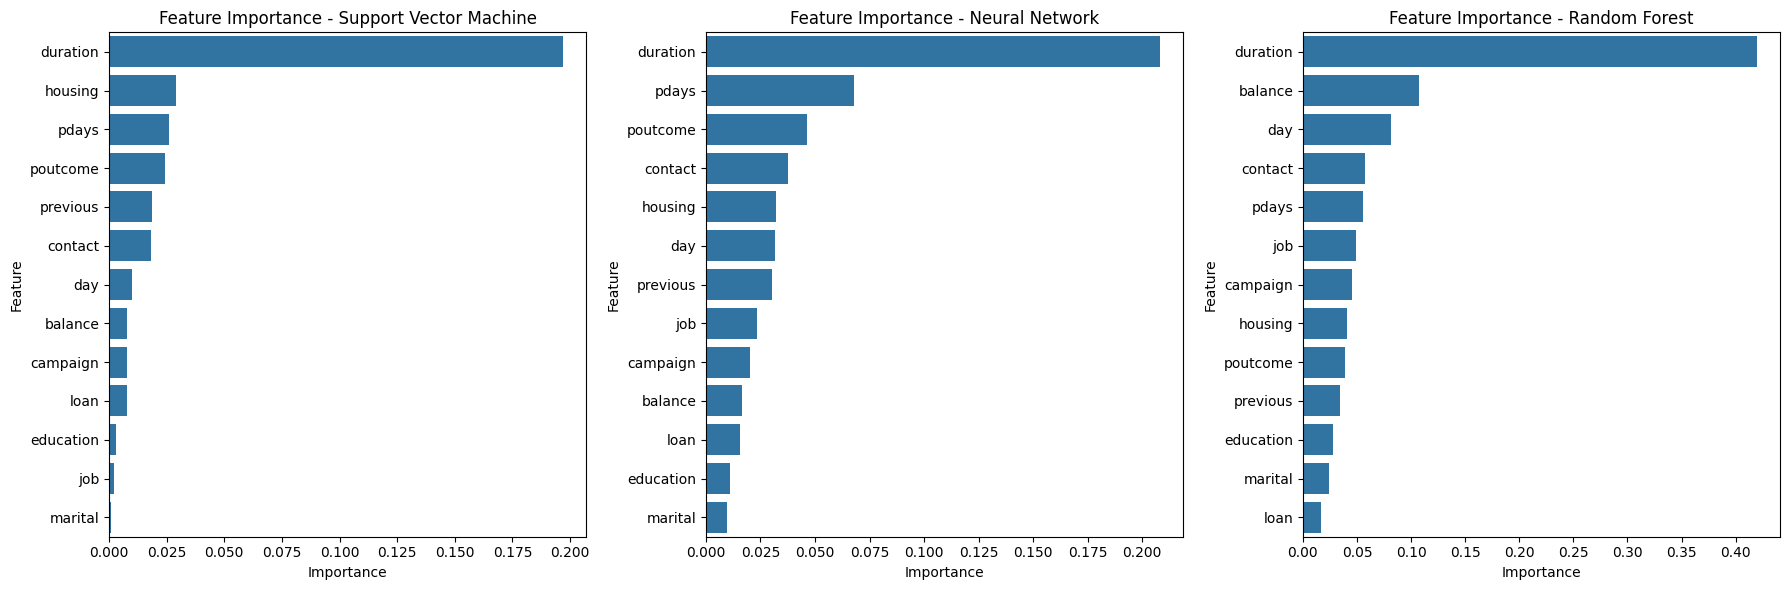

In [160]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=svm_features['Importance'], y=svm_features['Feature'])
plt.title("Feature Importance - Support Vector Machine")

# Plotting feature importance for SVM
plt.subplot(1, 3, 2)
sns.barplot(x=nn_features['Importance'], y=nn_features['Feature'])
plt.title("Feature Importance - Neural Network")

# Plotting feature importance for Neural Network
plt.subplot(1, 3, 3)
sns.barplot(x=rf_features['Importance'], y=rf_features['Feature'])
plt.title("Feature Importance - Random Forest")

plt.tight_layout()
plt.show()

##### **Observations**

1. **Key Feature**:  
   - The feature `duration` is consistently the most important across all models.

2. **Secondary Features**:  
   - **Random Forest**: Features like `balance`, `contact`, and `pdays` show notable importance, though less than `duration`.  
   - **SVM**: Features such as `housing`, `pdays`, and `poutcome` follow `duration` in importance.  
   - **Neural Network**: Highlights `pdays`, `poutcome`, and `previous` as relatively important features after `duration`.

3. **Low-Importance Features**:  
   - Features like `job`, `education`, `marital`, and `loan` consistently have lower importance across all models.


### **7) Feature Elimination**

Random Forest Classifiers can use RFECV. _[10]_

In [161]:
rfecv_rf = RFECV(estimator=grid_rf.best_estimator_, step=1, cv=5, scoring='accuracy')
rfecv_rf.fit(X_train, y_train)

print("Random Forest optimal feature count:", rfecv_rf.n_features_)

Random Forest optimal feature count: 13


For the other two, we can create a simple function to carry out RFE

In [162]:
# Generated by [11]
def rfe(model, X, y, step=1, min_features=1, cv=5):
    feature_indices = np.arange(X.shape[1])
    ranking = np.ones(X.shape[1], dtype=int)
    scores = []
    
    while len(feature_indices) > min_features:
        # Cross-validation to calculate the current score
        cv_score = cross_val_score(model, X.iloc[:, feature_indices], y, cv=cv, scoring='accuracy').mean()
        scores.append(cv_score)
        
        # Fit model to the current features
        model.fit(X.iloc[:, feature_indices], y)
        
        # Compute permutation importance
        perm_importance = permutation_importance(model, X.iloc[:, feature_indices], y, scoring='accuracy', n_repeats=5, random_state=42)
        feature_importances = perm_importance.importances_mean
        
        # Identify least important features
        least_important = np.argsort(feature_importances)[:step]
        ranking[feature_indices[least_important]] = len(feature_indices)
        feature_indices = np.delete(feature_indices, least_important)
        
        # Print progress
        print(f"| {len(feature_indices):<15} | {cv_score:.4f} |")
    
    return ranking, scores

# Generated by [12]
def perform_rfe_and_display(model, X, y, model_name, step=1):
    print("=" * 50)
    print(f"Recursive Feature Elimination for {model_name}")
    print("=" * 50)
    print(f"| {'Remaining Features':<15} | {'CV Score':<8} |")
    print("-" * 50)
    
    ranking, scores = rfe(model, X, y, step=step)
    
    # Display summary
    print("\nFeature Ranking:")
    feature_ranking = pd.DataFrame({'Feature Index': np.arange(1, len(ranking) + 1), 
                                    'Rank': ranking}).sort_values(by='Rank')
    print(feature_ranking.to_string(index=False))
    print("\nCross-Validation Scores:", scores)
    print("=" * 50)

# Execute Custom RFE for RBF SVC
rbf_svc = clone(grid_svm.best_estimator_)
perform_rfe_and_display(rbf_svc, X_train, y_train, "RBF SVC")

# Execute Custom RFE for MLPClassifier
mlp = clone(grid_nn.best_estimator_)
perform_rfe_and_display(mlp, X_train, y_train, "MLPClassifier")


Recursive Feature Elimination for RBF SVC
| Remaining Features | CV Score |
--------------------------------------------------
| 12              | 0.7998 |
| 11              | 0.7988 |
| 10              | 0.7989 |
| 9               | 0.7993 |
| 8               | 0.7951 |
| 7               | 0.7910 |
| 6               | 0.7857 |
| 5               | 0.7902 |
| 4               | 0.7833 |
| 3               | 0.7847 |
| 2               | 0.7746 |
| 1               | 0.7699 |

Feature Ranking:
 Feature Index  Rank
             9     1
            11     2
            13     3
             7     4
            12     5
             5     6
             8     7
             4     8
            10     9
             6    10
             3    11
             1    12
             2    13

Cross-Validation Scores: [0.7998225612618303, 0.7987987249969895, 0.7989269298101177, 0.7993105612094016, 0.7950865198168595, 0.7909905193974291, 0.7857432971001137, 0.7902228469988195, 0.7833106005310055, 0.7847

### **8) Validating against Test data**

In [163]:
# Generated by [9]
def validate_model(model, name, X_test=X_test, y_test=y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc_roc = roc_auc_score(y_test, y_pred)
    print(f"{'='*40}")
    print(f"{name:^40}")
    print(f"{'='*40}")
    print(f"{'Test Accuracy':<15}: {accuracy:.4f}")
    print(f"{'F1 Score':<15}: {f1:.4f}")
    print(f"{'AUC-ROC Score':<15}: {auc_roc:.4f}")
    print(f"{'='*40}")

validate_model(grid_svm.best_estimator_, "SVM")
validate_model(grid_nn.best_estimator_, "Neural Network")
validate_model(grid_rf.best_estimator_, "Random Forest")

                  SVM                   
Test Accuracy  : 0.8146
F1 Score       : 0.8145
AUC-ROC Score  : 0.8137
             Neural Network             
Test Accuracy  : 0.8101
F1 Score       : 0.8101
AUC-ROC Score  : 0.8099
             Random Forest              
Test Accuracy  : 0.8304
F1 Score       : 0.8305
AUC-ROC Score  : 0.8313


The Random Forest model proves to be the most useful for the business, outperforming other models across all key metrics.

### **9) Training Data Separation**

#### **Based on Month**

In [176]:
# Split the data based on the month column
train_data = df_updated[~df['month'].isin(['jun', 'jul'])]
test_data = df_updated[df['month'].isin(['jun', 'jul'])]

X_train_month = train_data.drop('deposit', axis=1)
y_train_month = train_data['deposit']
X_test_month = test_data.drop('deposit', axis=1)
y_test_month = test_data['deposit']

Let us try to use the best performing Random Forest model.

In [177]:
max_depth_range = np.linspace(1, 32, num=10, dtype=int)

param_grid_rf_month = {'max_depth': max_depth_range, 'max_features': ['sqrt', 'log2']}
grid_rf_month = GridSearchCV(RandomForestClassifier(), param_grid_rf_month, refit=True, cv=5, scoring='accuracy')
grid_rf_month.fit(X_train_month, y_train_month)

print("Optimal hyperparameters for Random Forest (Month Separated):", grid_rf_month.best_params_)

validate_model(grid_rf_month.best_estimator_, "Random Forest (Month Separated)", X_test_month, y_test_month)

Optimal hyperparameters for Random Forest (Month Separated): {'max_depth': 11, 'max_features': 'log2'}
    Random Forest (Month Separated)     
Test Accuracy  : 0.8406
F1 Score       : 0.8412
AUC-ROC Score  : 0.8419


Test results are suprisingly not all that different.

#### **Based on Job**

In [178]:
train_data = df_updated[df['job'] != 'technician']
test_data = df_updated[df['job'] == 'technician']

X_train_job = train_data.drop('deposit', axis=1)
y_train_job = train_data['deposit']
X_test_job = test_data.drop('deposit', axis=1)
y_test_job = test_data['deposit']

In [180]:
max_depth_range = np.linspace(1, 32, num=10, dtype=int)

param_grid_rf_job = {'max_depth': max_depth_range, 'max_features': ['sqrt', 'log2']}
grid_rf_job = GridSearchCV(RandomForestClassifier(), param_grid_rf_job, refit=True, cv=5, scoring='accuracy')
grid_rf_job.fit(X_train_job, y_train_job)

print("Optimal hyperparameters for Random Forest (Job Separated):", grid_rf_job.best_params_)

validate_model(grid_rf_job.best_estimator_, "Random Forest (Job Separated)", X_test_job, y_test_job)

Optimal hyperparameters for Random Forest (Job Separated): {'max_depth': 11, 'max_features': 'sqrt'}
     Random Forest (Job Separated)      
Test Accuracy  : 0.8064
F1 Score       : 0.8065
AUC-ROC Score  : 0.8102


One could find a profession that could substitute for technician by training a model on technician and seeing with which job it has the maximum accuracy.

In [182]:
# Generated by [15]

# List of possible jobs (excluding 'technician')
jobs = ['admin.', 'services', 'management', 'retired', 'blue-collar',
        'unemployed', 'entrepreneur', 'housemaid', 'unknown', 
        'self-employed', 'student']

# Dictionary to store accuracy scores for each job
job_accuracy_scores = {}

param_grid_rf_job = {'max_depth': max_depth_range, 'max_features': ['sqrt', 'log2']}
grid_rf_job = GridSearchCV(RandomForestClassifier(), param_grid_rf_job, refit=True, cv=5, scoring='accuracy')
grid_rf_job.fit(X_test_job, y_test_job)

# Loop through each job to evaluate as test data
for job in jobs:
    # Filter test data for the current job
    test_data = df_updated[df['job'] == job]
    
    # Skip if no data is available for the job
    if test_data.empty:
        continue
    
    # Prepare the test dataset
    X_test_job = test_data.drop('deposit', axis=1)
    y_test_job = test_data['deposit']
    
    # Predict on the test dataset
    y_pred = grid_rf_job.best_estimator_.predict(X_test_job)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_job, y_pred)
    job_accuracy_scores[job] = accuracy

# Sort jobs by accuracy in descending order
sorted_jobs = sorted(job_accuracy_scores.items(), key=lambda x: x[1], reverse=True)

# Print top substitutes
print("Top substitutes for 'technician':")
for job, acc in sorted_jobs:
    print(f"Job: {job}, Accuracy: {acc:.4f}")


Top substitutes for 'technician':
Job: blue-collar, Accuracy: 0.8333
Job: services, Accuracy: 0.8288
Job: housemaid, Accuracy: 0.8248
Job: admin., Accuracy: 0.8246
Job: self-employed, Accuracy: 0.8222
Job: entrepreneur, Accuracy: 0.8140
Job: unemployed, Accuracy: 0.7955
Job: management, Accuracy: 0.7938
Job: retired, Accuracy: 0.7674
Job: student, Accuracy: 0.7611
Job: unknown, Accuracy: 0.7429


## **Objective 2**

- **`os`**: Provides functions for interacting with the operating system, like handling file paths and environment variables.

### PyTorch Submodules and Their Usage

- **`torch`**: The core library for tensor operations, automatic differentiation, and model building.  
- **`torch.nn`**: Contains modules and classes for constructing neural networks, like layers and loss functions.  
- **`torch.utils.data`**: Provides utilities for data loading and batching, such as `DataLoader`.  

### TorchVision Submodules

- **`torchvision`**: A library for computer vision tasks, including pre-trained models and datasets.  
- **`torchvision.datasets`**: Provides built-in datasets for easy loading, like CIFAR-10 and ImageNet.  
- **`torchvision.models`**: Offers pre-trained deep learning models, such as ResNet and VGG.  
- **`torchvision.transforms`**: Includes data augmentation and preprocessing utilities, like resizing, normalization, and flipping. 

_Generated using AI_ 


In [184]:
import os

# PyTorch libraries
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, models, transforms

### **10) Testing the code**
_Code taken from [13]_

In [169]:
# Step 1: Data transformations (Resize and normalize)
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'hymenoptera_data'  # Replace with the path to your dataset

image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']
}

# Step 3: DataLoaders for the datasets
dataloaders = {
    x: DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

# Check the dataset classes (should be ants and bees)
class_names = image_datasets['train'].classes
print(class_names)

['ants', 'bees']


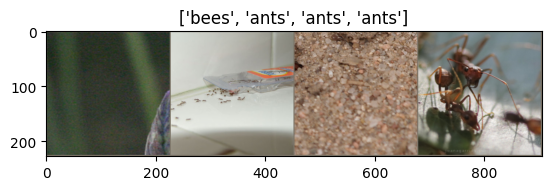

In [170]:
def imshow(inp, title=None):
    """
    Parameters:
        inp (torch.Tensor): Input image tensor
        title (str): Title for the image

    Returns:
        None
    """
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [171]:
# Load the pre-trained ResNet-18 model
model_conv = models.resnet18(weights='IMAGENET1K_V1')

# Step 4: Freeze the parameters so they are not updated during training
for param in model_conv.parameters():
    param.requires_grad = False

# Remove the final layer (fully connected) to use ResNet18 as a feature extractor
# The layer right before the final layer has a 512-dimensional output for ResNet18
model_conv = nn.Sequential(*list(model_conv.children())[:-1])

# Move the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_conv = model_conv.to(device)

### **11) Feature Extraction**

In [172]:
# [13] modified with [14]
def extract_features(model, mode):
    model.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in dataloaders[mode]:
            inputs = inputs.to(device)

            features = model(inputs)
            features = features.view(features.size(0), -1)

            features_list.append(features.cpu().numpy())
            labels_list.append(labels.cpu().numpy())

    features_array = np.concatenate(features_list, axis=0)
    labels_array = np.concatenate(labels_list, axis=0)
    return features_array, labels_array

train_features, train_labels = extract_features(model_conv, 'train')
val_features, val_labels = extract_features(model_conv, 'val')
print(f"Feature Count: {train_features.shape[0]}")

Feature Count: 244


### **12) L2 Regularization vs Random Forest**

In [173]:
log_reg = LogisticRegression(penalty='l2', max_iter=1000)
log_reg.fit(train_features, train_labels)
validate_model(log_reg, "Logistic Regression", val_features, val_labels)

          Logistic Regression           
Test Accuracy  : 0.9542
F1 Score       : 0.9543
AUC-ROC Score  : 0.9556


In [174]:
# Set up Random Forest and grid search
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, 30, None]  # Maximum depth of the tree
}

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search_rf.fit(train_features, train_labels)
validate_model(grid_search_rf.best_estimator_, "Random Forest", val_features, val_labels)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
             Random Forest              
Test Accuracy  : 0.9477
F1 Score       : 0.9478
AUC-ROC Score  : 0.9485


### **13) Summary**
Both Logistic Regression and Random Forest performed well using features from ResNet18, with Logistic Regression slightly ahead. This shows how pre-trained networks like ResNet18 can extract useful patterns, making even simple models robust and effective.

This approach is ideal for projects with limited resources or tight deadlines, as it avoids the need for full training of complex models.

The major reference for this objective was _[13]_, the "Transfer Learning for Computer Vision Tutorial" by Sasank Chilamkurthy

## **Attributions/References**

0. ChatGPT prompt  
   Add docstrings and necessary comments to this code-block. Suggest any changes or mistakes that you observe in the code too. Summarize the code-block in a explanation, that I need as MD
1. ChatGPT prompt  
   How can I encode these categories into numbers?
2. ChatGPT prompt:  
   Image is either too large or the words overlap
3. ChatGPT prompt:  
   Get the top 5 absolute values in the matrix, along with column names
4. ChatGPT prompt:  
   Do it in 2 columns instead
5. ChatGPT prompt:  
   What metrics would you suggest?
6. ChatGPT prompt:  
   Looking at these statistics, what would you say about some variables very likely to be unreliable, noisy, or otherwise immaterial?
7. ChatGPT prompt:  
   Perform 5-fold cross-validation of \<QUESTION\> with GridSearchCV
8. ChatGPT prompt:  
   Extract feature importance of all three models.
9. ChatGPT prompt:  
    Format the values in a table
10. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
11. ChatGPT prompt:  
    How can I perform RFECV for them?
12. ChatGPT prompt:  
    Make the formatting better
13. https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
14. ChatGPT:  
    Simplify this to only the necessary parts
15. ChatGPT:  
  My method was to have training data be techincian only, and check all other job only against it